# N-arms bandit experiment simulation

### Imports

In [39]:
import numpy as np
import matplotlib.pyplot as plt

### Paramters

In [40]:
STEPS = 2000
RUNS = 2000
CHANGE_INTERVAL = 100
CHANGE_SCALE = 0.05
ALPHA = 0.8
INITIAL_VALUE = 0
epsilons = [0, 0.01, 0.1]

### Simulation function

In [41]:
def simulation(eps, steps = STEPS, runs= RUNS, initial_value = INITIAL_VALUE):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for _ in range(runs):
        Q = [initial_value] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action])/N[action]
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions
    

### Visual plotting

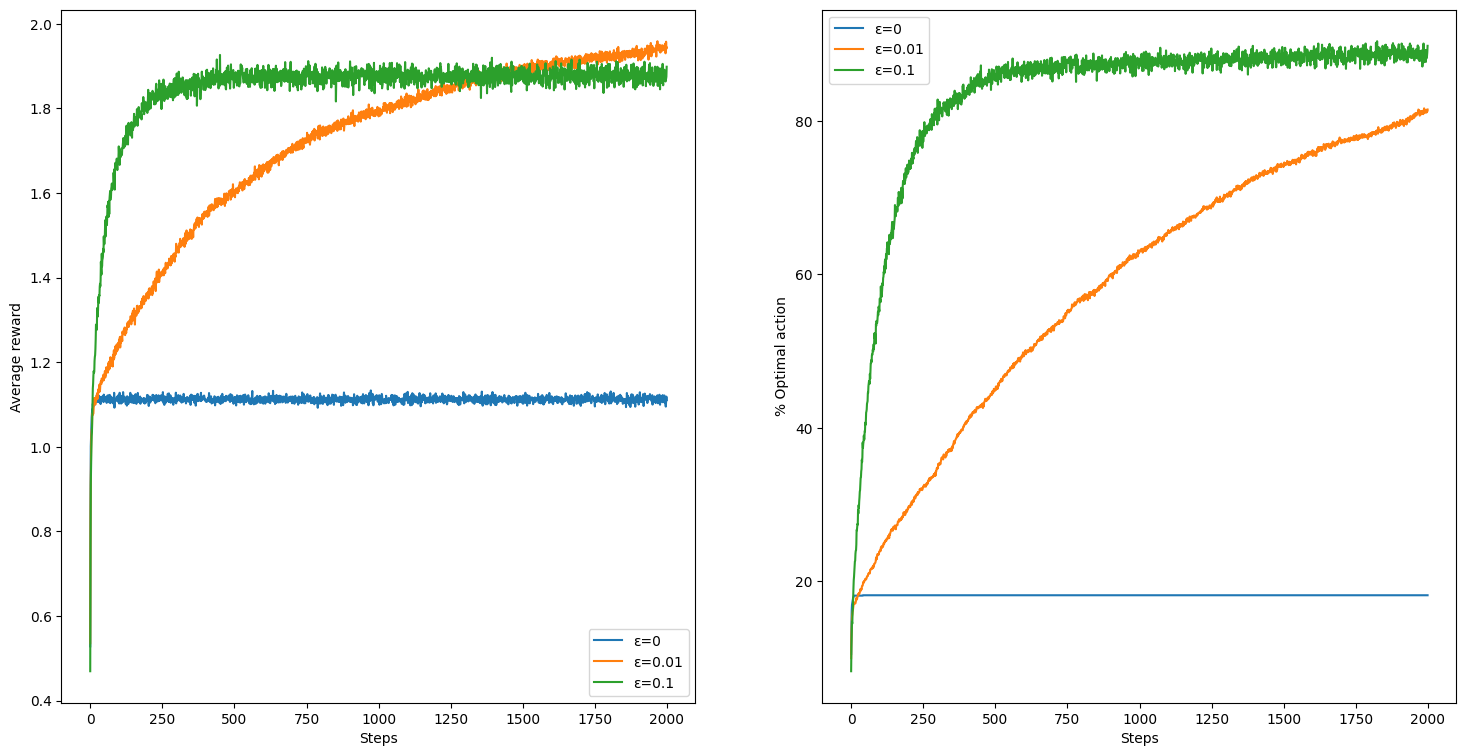

In [42]:
plt.figure(figsize=(18, 9))

# Pre-store results
results = {}
for eps in epsilons:
    avg_rewards, optimal_actions = simulation(eps)
    results[eps] = (avg_rewards, optimal_actions)

# Average reward
plt.subplot(1, 2, 1)
for eps, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
for eps, (_, optimal_actions) in results.items():
    plt.plot(optimal_actions, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

## Non stationary rewards case

In [43]:
def non_stationary_simulation(eps, steps = STEPS, runs= RUNS, change_interval = CHANGE_INTERVAL, change_scale = CHANGE_SCALE):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    for _ in range(runs):
        Q = [0] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if step %  change_interval == 0:
                q += np.random.normal(loc=0, scale=change_scale, size=10)
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action])/N[action]
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions

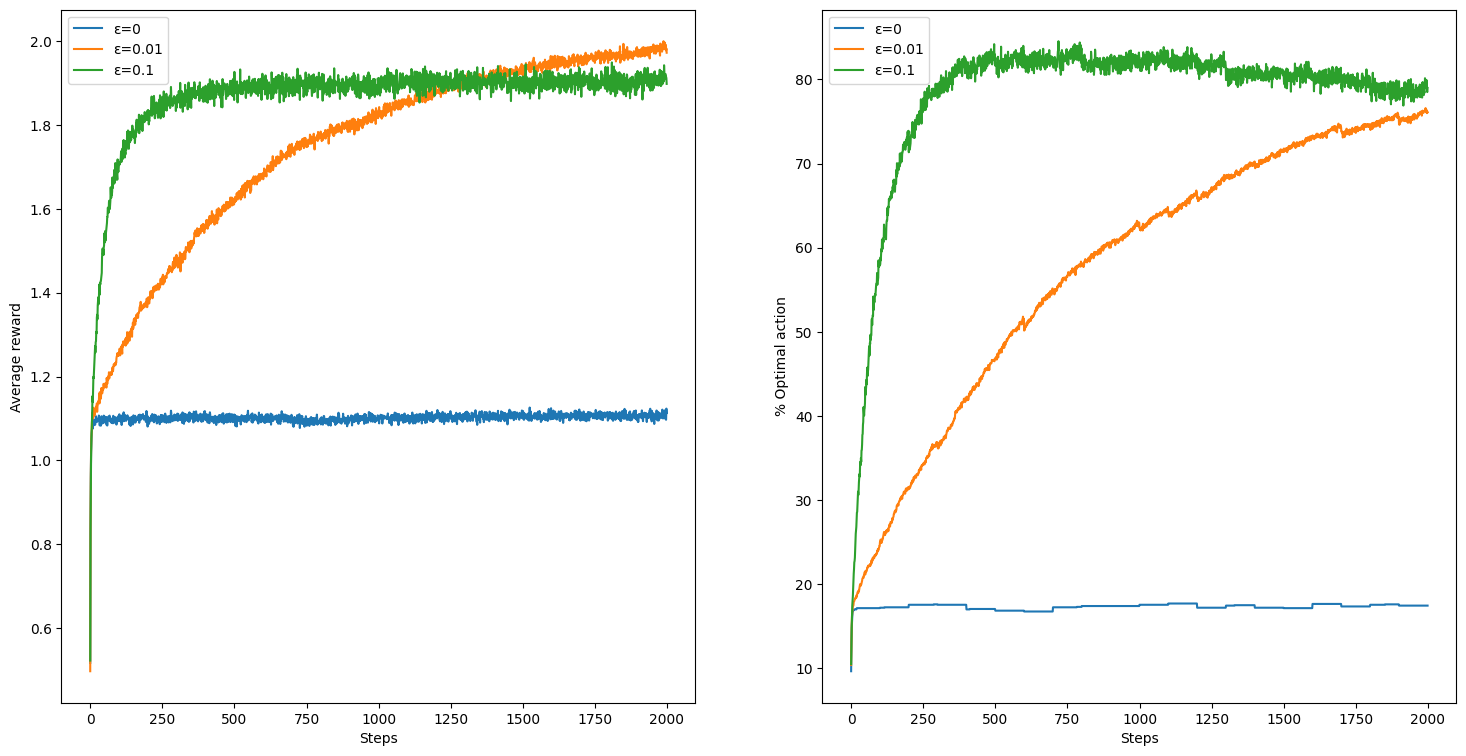

In [44]:
plt.figure(figsize=(18, 9))

# Pre-store results
results = {}
for eps in epsilons:
    avg_rewards, optimal_actions = non_stationary_simulation(eps)
    results[eps] = (avg_rewards, optimal_actions)

# Average reward
plt.subplot(1, 2, 1)
for eps, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
for eps, (_, optimal_actions) in results.items():
    plt.plot(optimal_actions, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

In [45]:
def non_stationary_simulation_alpha(eps, alpha=ALPHA, steps = STEPS, runs= RUNS, change_interval = CHANGE_INTERVAL, change_scale = CHANGE_SCALE):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    for _ in range(runs):
        Q = [0] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if step %  change_interval == 0:
                q += np.random.normal(loc=0, scale=change_scale, size=10)
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action]) * alpha
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions

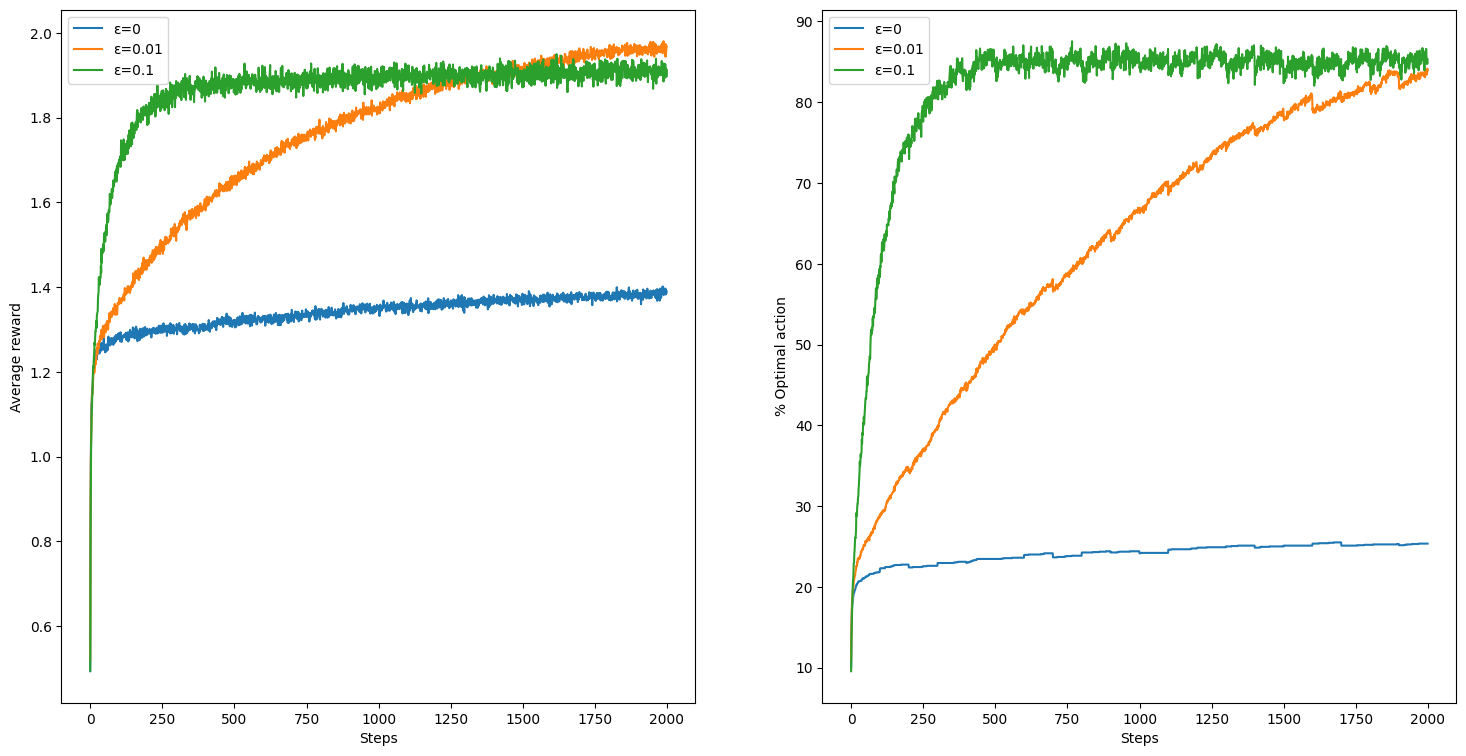

In [46]:
plt.figure(figsize=(18, 9))

# Pre-store results
results = {}
for eps in epsilons:
    avg_rewards, optimal_actions = non_stationary_simulation_alpha(eps)
    results[eps] = (avg_rewards, optimal_actions)

# Average reward
plt.subplot(1, 2, 1)
for eps, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
for eps, (_, optimal_actions) in results.items():
    plt.plot(optimal_actions, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

## Optimistic Initial Values

In [47]:
initial_values = [0, 5]
ALPHA = 0.1
C = 2

In [48]:
def simulation_alpha(eps, steps = STEPS, runs= RUNS, initial_value = INITIAL_VALUE, alpha=ALPHA):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for _ in range(runs):
        Q = [initial_value] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action]) * alpha
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions
    

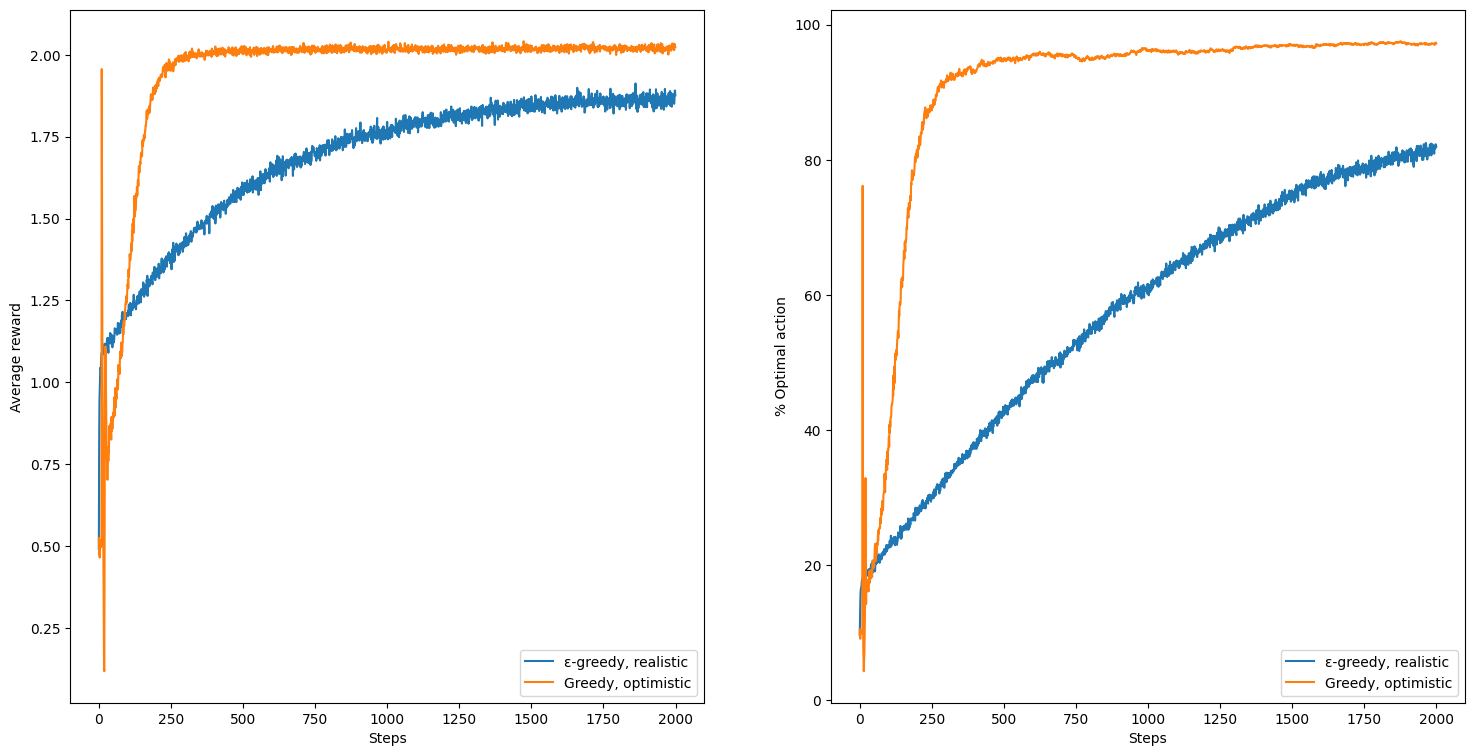

In [49]:
plt.figure(figsize=(18, 9))

# Pre-store results
avg_rewards_greedy_optimistic, optimal_actions_greedy_optimistic = simulation_alpha(eps=0, initial_value=5)
avg_rewards_epsgreedy_realistic, optimal_actions_epsgreedy_realistic = simulation_alpha(eps=0.1, initial_value=0)

# Average reward
plt.subplot(1, 2, 1)
plt.plot(avg_rewards_epsgreedy_realistic, label=f"ε-greedy, realistic")
plt.plot(avg_rewards_greedy_optimistic, label=f"Greedy, optimistic")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
plt.plot(optimal_actions_epsgreedy_realistic, label=f"ε-greedy, realistic")
plt.plot(optimal_actions_greedy_optimistic, label=f"Greedy, optimistic")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

## Upper confidence bound

In [51]:
def simulation_ucb(eps=0, steps = STEPS, runs= RUNS, initial_value = 0, alpha=ALPHA, c=C):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for _ in range(runs):
        Q = np.full(10, initial_value, dtype=float)
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(1, steps+1):
            ucb_values = np.zeros(10)
            for a in range(10):
                if N[a] > 0:
                    ucb_values[a] = Q[a] + c * np.sqrt(np.log(step) / N[a])
                else:
                    ucb_values[a] = float('inf')
            action = np.argmax(ucb_values)
            reward = q[action] + np.random.rand()
            rewards[step-1] += reward
            N[action] += 1
            Q[action] += (reward - Q[action]) /N[action]
            optimal_actions[step-1] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions

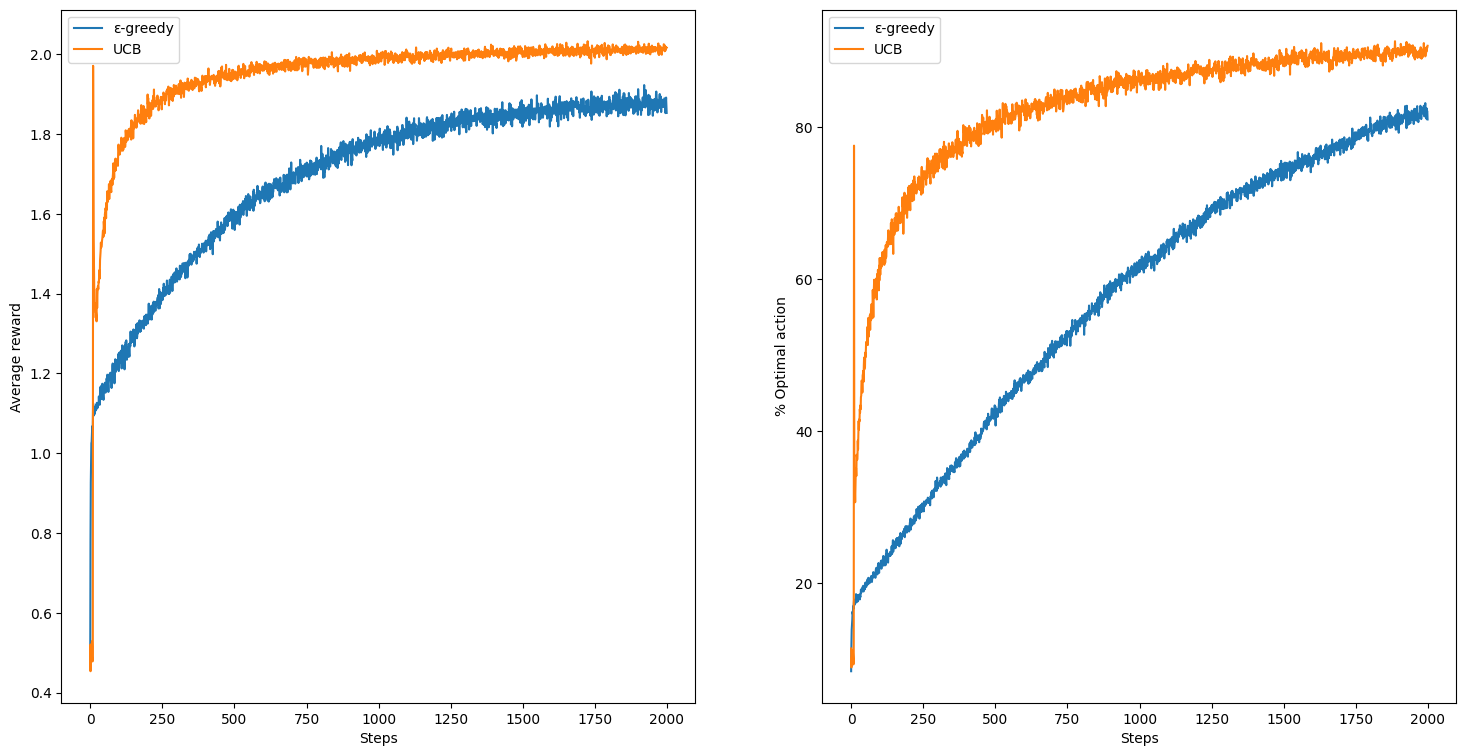

In [52]:
plt.figure(figsize=(18, 9))

# Pre-store results
avg_rewards_ucb, optimal_actions_ucb = simulation_ucb(eps=0, initial_value=0, alpha=0.1)
avg_rewards_epsgreedy, optimal_actions_epsgreedy = simulation_alpha(eps=0.1, initial_value=0)

# Average reward
plt.subplot(1, 2, 1)
plt.plot(avg_rewards_epsgreedy, label=f"ε-greedy")
plt.plot(avg_rewards_ucb, label=f"UCB")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
plt.plot(optimal_actions_epsgreedy, label=f"ε-greedy")
plt.plot(optimal_actions_ucb, label=f"UCB")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()